Задание: Написать код, автоматизирующий построение карт Шухарта для процесса испытания углеродных волокон на разрыв. 

Исходные данные приведены в Excel-таблицах (20.xlsx, 30.xlsx, 40.xlsx). Необходимо отслеживать параметры: 
1) Fmax;
2) σ_M; 
3) dL при Fмакс.

Для мониторинга процесса нужно использовать переменные — групповое среднее и групповой размах.

По данным необходимо построить три гистограммы: одна — для всех измерений, другая — для 20 групповых средних, третья — для 20 групповых размахов.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data preprocessing

In [13]:
df1 = pd.read_excel('20-1.xlsx')
df2 = pd.read_excel('30-1.xlsx')
df3 = pd.read_excel('40-1.xlsx')

In [14]:
df1 = df1.rename(columns={
    'Unnamed: 0': 'Sample',
    'Eмод': 'Emod (GPa)',
    'Fmax': 'Fmax (N)',
    'sM': 'sM (MPa)',
    'dL при Fмакс': 'dL_Fmax (%)'
}).iloc[1:, :]

In [15]:
df1.head()

,Sample,Emod (GPa),Fmax (N),sM (MPa),dL_Fmax (%)
1,Образец1.1,204.848452,1827.948608,4112.884369,1.682568
2,Образец1.2,203.617195,1652.758667,3718.707001,1.576634
3,Образец1.3,219.409201,1836.640747,4132.441681,1.652574
4,Образец1.4,205.736286,1806.20813,4063.968292,1.686891
5,Образец1.5,206.353258,1835.067871,4128.90271,1.732882


In [16]:
df2 = df2.rename(columns={
    'Unnamed: 0': 'Sample',
    'Eмод': 'Emod (GPa)',
    'Fmax': 'Fmax (N)',
    'sM': 'sM (MPa)',
    'dL при Fмакс': 'dL_Fmax (%)'
}).iloc[1:, :]

In [17]:
df2.head()

,Sample,Emod (GPa),Fmax (N),sM (MPa),dL_Fmax (%)
1,Образец1.1,208.682021,1643.170166,3697.132874,1.543914
2,Образец1.2,208.503842,1611.37854,3625.601715,1.508225
3,Образец1.3,208.582353,1686.612305,3794.877686,1.576771
4,Образец1.4,203.848376,1817.915161,4090.309113,1.715808
5,Образец1.5,211.977762,1784.146484,4014.32959,1.649445


In [18]:
df3 = df3.rename(columns={
    'Unnamed: 0': 'Sample',
    'Eмод': 'Emod (GPa)',
    'Fmax': 'Fmax (N)',
    'sM': 'sM (MPa)',
    'dL при Fмакс': 'dL_Fmax (%)'
}).iloc[1:, :]

In [19]:
df3.head()

,Sample,Emod (GPa),Fmax (N),sM (MPa),dL_Fmax (%)
1,Образец3.1,208.799009,1970.029297,4432.565918,1.834823
2,Образец3.2,215.34115,1968.794067,4429.786652,1.780208
3,Образец3.3,209.135015,1892.970581,4259.183807,1.743159
4,Образец3.4,216.689785,1818.658203,4091.980957,1.639657
5,Образец3.5,211.257031,1867.913696,4202.805817,1.702996


## 2. Exploratory data analysis

In [21]:
df = pd.concat([df1, df2, df3])
df.sample(10)

,Sample,Emod (GPa),Fmax (N),sM (MPa),dL_Fmax (%)
77,Образец5.23,208.361563,1674.03894,3766.587616,1.563193
187,Образец9.15,218.878632,1781.570679,4008.534027,1.603484
51,Образец4.18,211.055997,1905.554321,4287.497223,1.752508
124,Образец7.14,212.635225,1843.481201,4147.832703,1.687753
80,Образец5.26,212.995153,1793.297119,4034.918518,1.642983
30,Образец2.1,210.765936,1633.56665,3675.524963,1.519438
171,Образец8.29,204.540602,2025.828613,4558.11438,1.886216
28,Образец1.28,199.40373,1655.724243,3725.379547,1.568594
210,Образец10.3,210.724814,1723.661255,3878.237823,1.595556
214,Образец7.28,215.006662,1936.812866,4357.828949,1.767956


In [ ]:
# Функция для построения гистограмм
def plot_histograms(column_name):
    data = df[column_name]

    # Разделение данных на 20 групп
    df['Group'] = pd.cut(df.index, bins=20, labels=False)

    # Вычисление средних и размахов для каждой группы
    group_means = df.groupby('Group')[column_name].mean()
    group_ranges = df.groupby('Group')[column_name].apply(lambda x: x.max() - x.min())

    # Построение гистограмм
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    data.hist(bins=20, edgecolor='black')
    plt.title(f'Гистограмма всех измерений ({column_name})')

    plt.subplot(1, 3, 2)
    group_means.hist(bins=20, edgecolor='black')
    plt.title(f'Гистограмма групповых средних ({column_name})')

    plt.subplot(1, 3, 3)
    group_ranges.hist(bins=20, edgecolor='black')
    plt.title(f'Гистограмма групповых размахов ({column_name})')

    plt.tight_layout()
    plt.show()

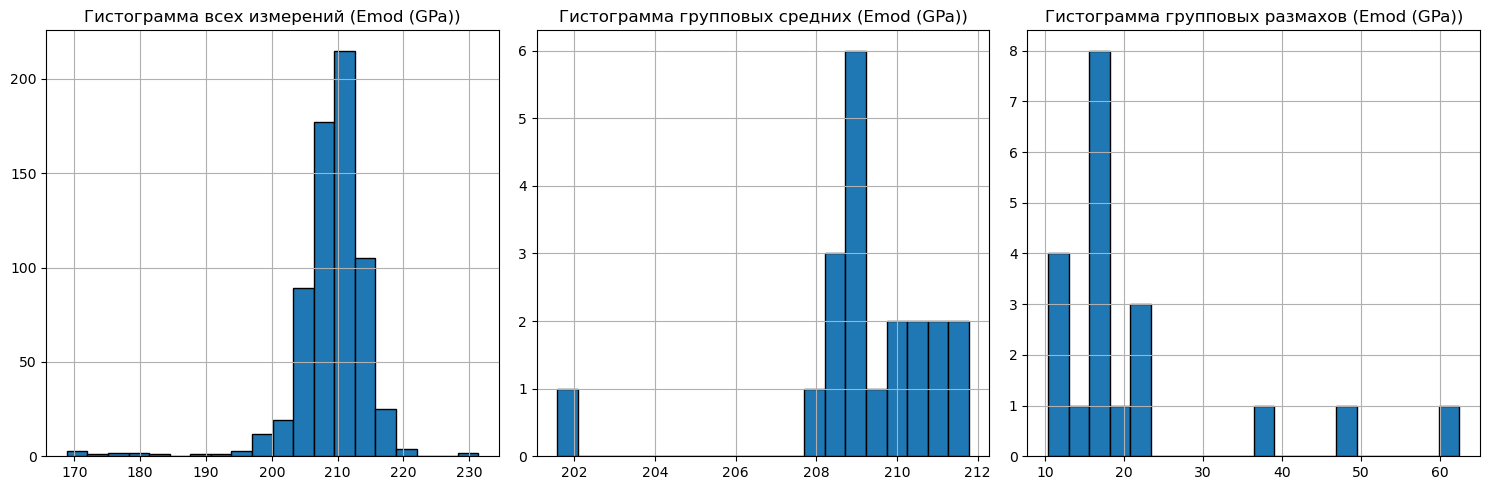

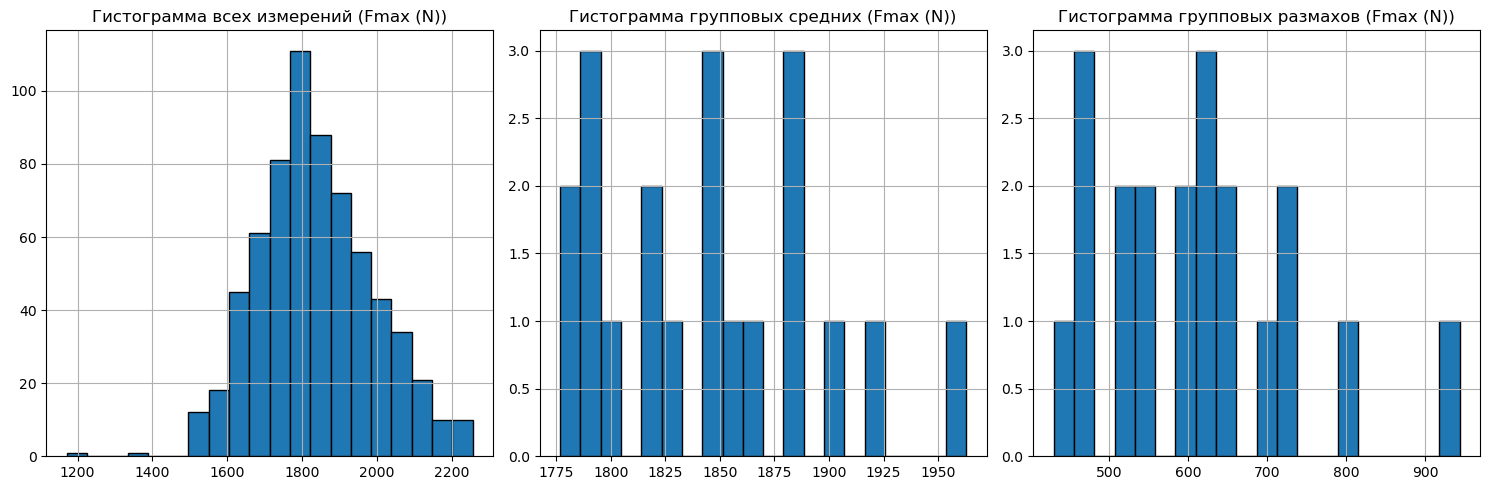

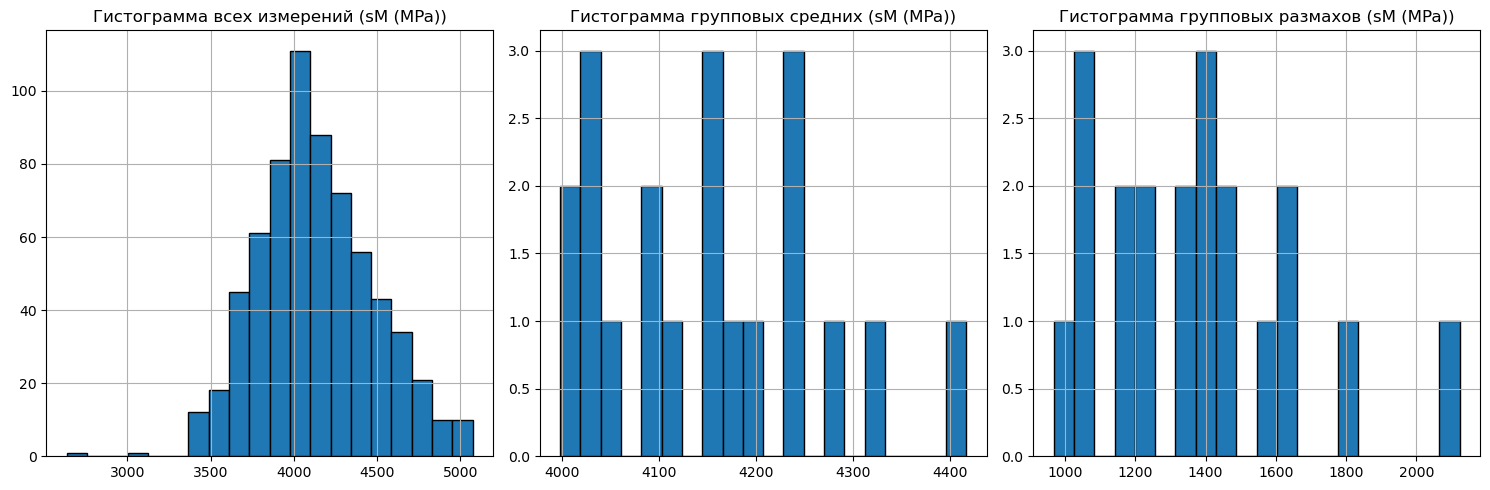

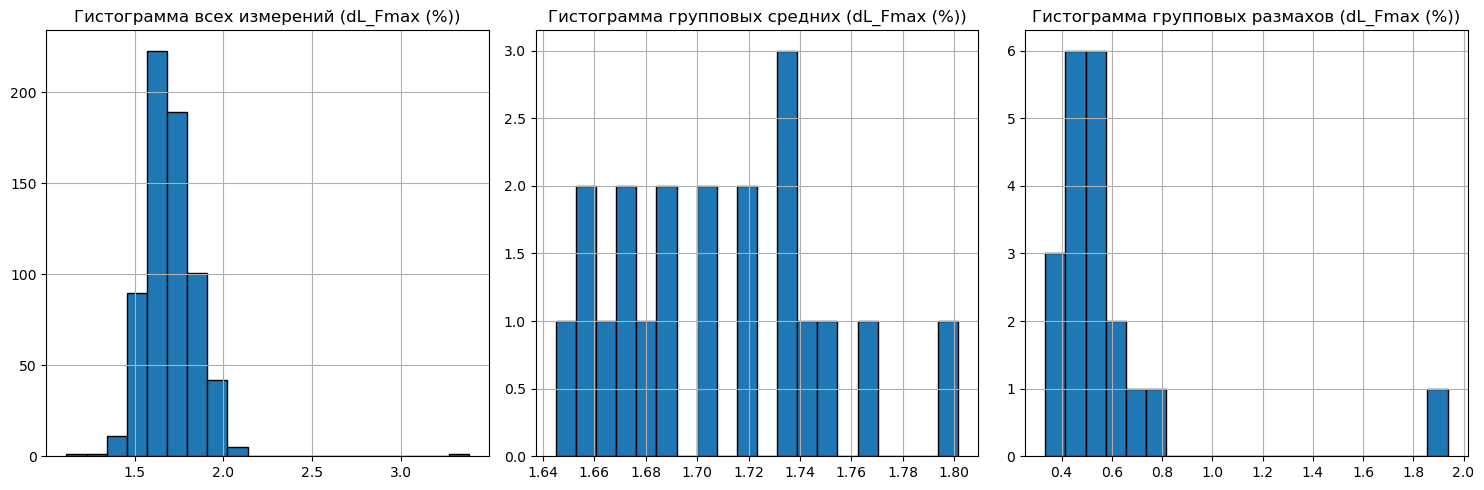

In [29]:
# Построение гистограмм для каждой колонки
columns = ['Emod (GPa)', 'Fmax (N)', 'sM (MPa)', 'dL_Fmax (%)']
for column in columns:
    plot_histograms(column)

## 3. Сalculation of control limits

Далее необходимо рассчитать контрольные пределы для данных, сгруппированных в k подгрупп по n элементов в каждой:


	1. Рассчитывается среднее и размах для каждой из k подгрупп.
	2. Рассчитывается среднее X ̿средних (усреднением k групповых средних).
	3. Усреднением групповых размахов рассчитывается средний размах R ̅.
	4. Центральной линией для карты средних (X-карты) будет X ̿, а для карты размахов (R-карты) - R ̅.
	5. Определяются значения констант А_2, D_3, D_4, соответствующих объему подгрупп, равному n (см. таблицу ниже).
	6. Рассчитывается произведение A_2 R ̅
	7. Величина, рассчитанная на шаге 6, добавляется к среднему средних, чтобы получить верхний контрольный предел X-карты: UCL_X ̅ =X ̿+A_2 R ̅.
	8. Величина, рассчитанная на шаге 6, вычитается из среднего средних, чтобы получить нижний контрольный предел X-карты: LCL_X ̅ =X ̿-A_2 R ̅.
	9. R ̅ умножается на D_4, чтобы получить верхний контрольный предел R-карты: UCL_R=D_4 R ̅.
	10. R ̅ умножается на D_3, чтобы получить нижний контрольный предел R-карты: LCL_R=D_3 R ̅.

In [30]:
# Функция для расчета контрольных пределов
def calculate_control_limits(column_name):
    data = df[column_name]

    # Разделение данных на подгруппы
    df['Group'] = pd.cut(df.index, bins=20, labels=False)

    # Вычисление средних и размахов для каждой подгруппы
    group_means = df.groupby('Group')[column_name].mean()
    group_ranges = df.groupby('Group')[column_name].apply(lambda x: x.max() - x.min())

    # Расчет X̿ и R̅
    X_bar_bar = group_means.mean()
    R_bar = group_ranges.mean()

    # Константы для контрольных пределов (для n = 5)
    A2 = 0.577
    D3 = 0
    D4 = 2.114

    # Расчет контрольных пределов для X-карты
    UCL_X = X_bar_bar + A2 * R_bar
    LCL_X = X_bar_bar - A2 * R_bar

    # Расчет контрольных пределов для R-карты
    UCL_R = D4 * R_bar
    LCL_R = D3 * R_bar

    return X_bar_bar, R_bar, UCL_X, LCL_X, UCL_R, LCL_R

#### Emod (GPa)

In [ ]:
# Расчет для колонки 'Emod (GPa)'
X_bar_bar, R_bar, UCL_X, LCL_X, UCL_R, LCL_R = calculate_control_limits('Emod (GPa)')

print(f'Среднее средних (X̿): {X_bar_bar}')
print(f'Средний размах (R̅): {R_bar}')
print(f'Верхний контрольный предел X-карты (UCL_X): {UCL_X}')
print(f'Нижний контрольный предел X-карты (LCL_X): {LCL_X}')
print(f'Верхний контрольный предел R-карты (UCL_R): {UCL_R}')
print(f'Нижний контрольный предел R-карты (LCL_R): {LCL_R}')

Среднее средних (X̿): 209.21857969024057
Средний размах (R̅): 21.184825851521094
Верхний контрольный предел X-карты (UCL_X): 221.44222420656826
Нижний контрольный предел X-карты (LCL_X): 196.9949351739129
Верхний контрольный предел R-карты (UCL_R): 44.78472185011559
Нижний контрольный предел R-карты (LCL_R): 0.0


#### Fmax (N)

In [32]:
# Расчет для колонки 'Fmax (N)'
X_bar_bar, R_bar, UCL_X, LCL_X, UCL_R, LCL_R = calculate_control_limits('Fmax (N)')

print(f'Среднее средних (X̿): {X_bar_bar}')
print(f'Средний размах (R̅): {R_bar}')
print(f'Верхний контрольный предел X-карты (UCL_X): {UCL_X}')
print(f'Нижний контрольный предел X-карты (LCL_X): {LCL_X}')
print(f'Верхний контрольный предел R-карты (UCL_R): {UCL_R}')
print(f'Нижний контрольный предел R-карты (LCL_R): {LCL_R}')

Среднее средних (X̿): 1845.268985057081
Средний размах (R̅): 611.3366821289062
Верхний контрольный предел X-карты (UCL_X): 2198.0102506454596
Нижний контрольный предел X-карты (LCL_X): 1492.5277194687021
Верхний контрольный предел R-карты (UCL_R): 1292.3657460205077
Нижний контрольный предел R-карты (LCL_R): 0.0


#### sM (MPa)

In [33]:
# Расчет для колонки 'sM (MPa)'
X_bar_bar, R_bar, UCL_X, LCL_X, UCL_R, LCL_R = calculate_control_limits('sM (MPa)')

print(f'Среднее средних (X̿): {X_bar_bar}')
print(f'Средний размах (R̅): {R_bar}')
print(f'Верхний контрольный предел X-карты (UCL_X): {UCL_X}')
print(f'Нижний контрольный предел X-карты (LCL_X): {LCL_X}')
print(f'Верхний контрольный предел R-карты (UCL_R): {UCL_R}')
print(f'Нижний контрольный предел R-карты (LCL_R): {LCL_R}')

Среднее средних (X̿): 4151.855216378432
Средний размах (R̅): 1375.507534790039
Верхний контрольный предел X-карты (UCL_X): 4945.523063952284
Нижний контрольный предел X-карты (LCL_X): 3358.187368804579
Верхний контрольный предел R-карты (UCL_R): 2907.8229285461425
Нижний контрольный предел R-карты (LCL_R): 0.0


#### dL_Fmax (%)

In [ ]:
# Расчет для колонки 'dL_Fmax (%)'
X_bar_bar, R_bar, UCL_X, LCL_X, UCL_R, LCL_R = calculate_control_limits('dL_Fmax (%)')

print(f'Среднее средних (X̿): {X_bar_bar}')
print(f'Средний размах (R̅): {R_bar}')
print(f'Верхний контрольный предел X-карты (UCL_X): {UCL_X}')
print(f'Нижний контрольный предел X-карты (LCL_X): {LCL_X}')
print(f'Верхний контрольный предел R-карты (UCL_R): {UCL_R}')
print(f'Нижний контрольный предел R-карты (LCL_R): {LCL_R}')

Среднее средних (X̿): 1.70685446726952
Средний размах (R̅): 0.5831644254071371
Верхний контрольный предел X-карты (UCL_X): 2.043340340729438
Нижний контрольный предел X-карты (LCL_X): 1.370368593809602
Верхний контрольный предел R-карты (UCL_R): 1.2328095953106877
Нижний контрольный предел R-карты (LCL_R): 0.0
